In [2]:
import numpy as np
from skimage.draw import polygon

In [3]:
img = np.zeros((10, 10), dtype=np.uint8)
rr, cc = polygon([1, 2, 8], [1, 7, 4])

In [4]:
img[rr, cc] = 1

In [5]:
img

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [6]:
import matplotlib.pyplot as plt

In [13]:
x=[1,2,8,1]
y=[1,7,4,1]

xy = np.array([x,y])
xy = xy.T
xy

array([[1, 1],
       [2, 7],
       [8, 4],
       [1, 1]])

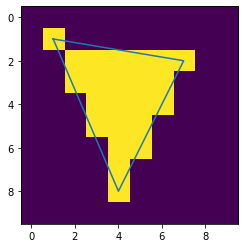

In [18]:
fig, ax = plt.subplots(1,1)

plt.imshow(img)

ax.plot(y, x)

plt.show()

> https://pygis.io/_images/zonal_stats.jpg

![](static/zonal_stats.jpg)

如果不用all touch，

对于每一个像素，生成一个中心点，判断点是否在polygon内

如果all touch

建立像素交叉点，并生成交叉点对应的像素点编号

| cid | is_in | 
|---|---|
| 100 100 | True |
| 100 101 | False |

然后reshape一下成为2D即可。

检索表

| pid | lt | rt | ld | rd |
| --- | --- | --- | ---|---|
| 100 100 | cid | cid | cid | cid |

检索表每一列相乘，即可得到这个像素要不要保留的表，然后把结果reshape成2D的即可得到mask（有可能需要去掉最后一列和最后一行）

In [19]:
img_shape = (10, 10)   # (h, w)

`all_touch=False`

In [22]:
h, w = img_shape

# the center points of pixel
x = np.arange(0, h) + 0.5
y = np.arange(0, w) + 0.5

x, y

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]))

In [23]:
xx, yy = np.meshgrid(x, y)
xx

array([[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5],
       [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5],
       [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5],
       [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5],
       [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5],
       [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5],
       [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5],
       [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5],
       [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5],
       [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]])

In [31]:
pts = np.array([xx.ravel(), yy.ravel()]).T
pts

array([[0.5, 0.5],
       [1.5, 0.5],
       [2.5, 0.5],
       [3.5, 0.5],
       [4.5, 0.5],
       [5.5, 0.5],
       [6.5, 0.5],
       [7.5, 0.5],
       [8.5, 0.5],
       [9.5, 0.5],
       [0.5, 1.5],
       [1.5, 1.5],
       [2.5, 1.5],
       [3.5, 1.5],
       [4.5, 1.5],
       [5.5, 1.5],
       [6.5, 1.5],
       [7.5, 1.5],
       [8.5, 1.5],
       [9.5, 1.5],
       [0.5, 2.5],
       [1.5, 2.5],
       [2.5, 2.5],
       [3.5, 2.5],
       [4.5, 2.5],
       [5.5, 2.5],
       [6.5, 2.5],
       [7.5, 2.5],
       [8.5, 2.5],
       [9.5, 2.5],
       [0.5, 3.5],
       [1.5, 3.5],
       [2.5, 3.5],
       [3.5, 3.5],
       [4.5, 3.5],
       [5.5, 3.5],
       [6.5, 3.5],
       [7.5, 3.5],
       [8.5, 3.5],
       [9.5, 3.5],
       [0.5, 4.5],
       [1.5, 4.5],
       [2.5, 4.5],
       [3.5, 4.5],
       [4.5, 4.5],
       [5.5, 4.5],
       [6.5, 4.5],
       [7.5, 4.5],
       [8.5, 4.5],
       [9.5, 4.5],
       [0.5, 5.5],
       [1.5, 5.5],
       [2.5,

In [27]:
from shapely.geometry import MultiPoint

In [73]:
points = MultiPoint(pts)

In [34]:
from shapely.geometry import Polygon

In [74]:
# polygon
poly = Polygon(xy)

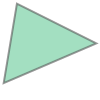

In [37]:
poly

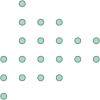

In [92]:
points_in = points.intersection(poly)
points_in

In [93]:
[poly, points_in]

In [76]:
points_in.wkt

'MULTIPOINT (1.5 1.5, 1.5 2.5, 1.5 3.5, 2.5 2.5, 2.5 3.5, 2.5 4.5, 2.5 5.5, 2.5 6.5, 3.5 2.5, 3.5 3.5, 3.5 4.5, 3.5 5.5, 4.5 2.5, 4.5 3.5, 4.5 4.5, 4.5 5.5, 5.5 3.5, 5.5 4.5, 6.5 3.5, 6.5 4.5)'

In [61]:
np.array(points_in)

c:\Users\hwang\.conda\envs\easyidp\lib\site-packages\IPython\core\interactiveshell.py:3398: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[1.5, 1.5],
       [1.5, 2.5],
       [1.5, 3.5],
       [2.5, 2.5],
       [2.5, 3.5],
       [2.5, 4.5],
       [2.5, 5.5],
       [2.5, 6.5],
       [3.5, 2.5],
       [3.5, 3.5],
       [3.5, 4.5],
       [3.5, 5.5],
       [4.5, 2.5],
       [4.5, 3.5],
       [4.5, 4.5],
       [4.5, 5.5],
       [5.5, 3.5],
       [5.5, 4.5],
       [6.5, 3.5],
       [6.5, 4.5]])

In [79]:
import warnings
warnings.filterwarnings("ignore")

In [81]:
idx = (np.array(points_in) - 0.5).astype(int)
idx

array([[1, 1],
       [1, 2],
       [1, 3],
       [2, 2],
       [2, 3],
       [2, 4],
       [2, 5],
       [2, 6],
       [3, 2],
       [3, 3],
       [3, 4],
       [3, 5],
       [4, 2],
       [4, 3],
       [4, 4],
       [4, 5],
       [5, 3],
       [5, 4],
       [6, 3],
       [6, 4]])

In [84]:
mask = np.zeros(img_shape, dtype=bool)
mask

array([[False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False]])

In [86]:
mask[idx[:,0], idx[:,1]] = True
mask

array([[False, False, False, False, False, False, False, False, False,
        False],
       [False,  True,  True,  True, False, False, False, False, False,
        False],
       [False, False,  True,  True,  True,  True,  True, False, False,
        False],
       [False, False,  True,  True,  True,  True, False, False, False,
        False],
       [False, False,  True,  True,  True,  True, False, False, False,
        False],
       [False, False, False,  True,  True, False, False, False, False,
        False],
       [False, False, False,  True,  True, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False]])

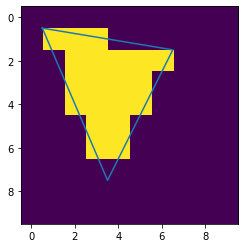

In [103]:
fig, ax = plt.subplots(1,1)

plt.imshow(mask)

ax.plot(*np.flip(xy-0.5,axis=1).T)   # plt.imshow shift 0.5 pixels

plt.show()

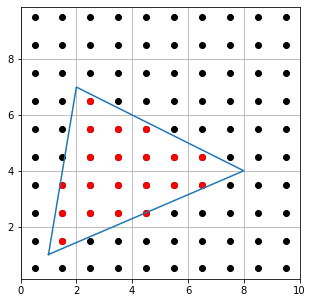

In [102]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.scatter(*np.array(points).T, c='k')
ax.plot(*poly.exterior.xy)
ax.scatter(*np.array(points_in).T, c='r')
ax.axis('equal')

plt.grid()

ax.set_xlim(0,10)
ax.set_ylim(0,10)

plt.show()


```python
# more efficient way for complex polygon
# https://shapely.readthedocs.io/en/latest/manual.html#prepared-geometry-operations

from shapely.prepared import prep

prepared_polygon = prep(poly)

# seems points need to be [Point, Point, Point,] rather than Multipoint
```

---

重新设计一下逻辑
如果输入的type是int，意味着为准确的像素，则所有的坐标偏移0.5，如果输入的float，说明为地理类信息？不用进行坐标偏移

In [188]:
def _view_poly2mask(poly, mask, pix_all, pix_in):
    h, w = mask.shape

    fig, ax = plt.subplots(1,1, figsize=(7, 7 * h/w))

    # draw figures
    # https://matplotlib.org/stable/tutorials/intermediate/imshow_extent.html
    ax.imshow(mask, extent=[0, w, 0, h], origin="lower", cmap="Pastel1_r")

    # -------------
    # draw scatters
    # -------------

    # the coordinate system is reversed for axes
    poly = np.flip(poly, axis=1)
    pix_in = np.flip(pix_in, axis=1)
    pix_all = np.flip(pix_all, axis=1)

    ax.scatter(*np.array(pix_all).T, c='k')
    ax.plot(*(poly).T)
    ax.scatter(*np.array(pix_in).T, c='r')
    ax.axis('equal')

    #plt.grid()

    ax.set_xlim(0,w)
    ax.set_ylim(0,h)

    ax.set_xlabel("Y")
    ax.set_ylabel("X")

    plt.gca().invert_yaxis()

    plt.show()

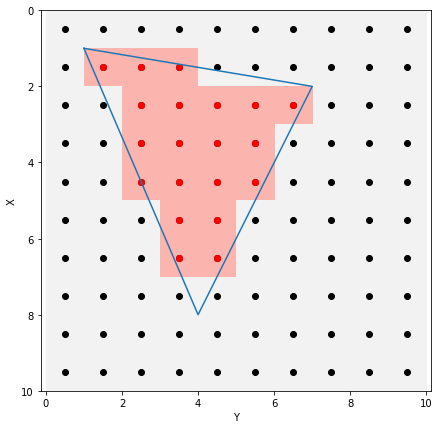

In [189]:
_view_poly2mask(xy, mask, np.array(points), np.array(points_in))

# check packed functions

In [151]:
import sys
sys.path.insert(0, '..')

In [152]:
import easyidp

In [193]:
coord = np.array([[1,1],[7,8],[8,5],[6,3],[1,1]], dtype=np.int8)

In [194]:
def polygon2mask(image_shape, poly_coord, all_touched=False, preview=False):
    # https://stackoverflow.com/questions/62280398/checking-if-a-point-is-contained-in-a-polygon-multipolygon-for-many-points

    # all_touched: https://pygis.io/_images/zonal_stats.jpg

    h, w = image_shape

    # check whether the poly_coords out of mask boundary
    xmin, ymin = poly_coord.min(axis=0)
    xmax, ymax = poly_coord.max(axis=0)

    if xmin < 0 or ymin < 0 or xmax >= h or ymax >= w:
        raise ValueError("The polygon is out of mask boundary")

    mask = np.zeros(image_shape, dtype=bool)

    if all_touched:
        pass
    else:
        # use the pixel center as judgement points
        x = np.arange(0, h) + 0.5
        y = np.arange(0, w) + 0.5

        xx, yy = np.meshgrid(x, y)

        # get the coordinates of all pixel points
        pts = np.array([xx.ravel(), yy.ravel()]).T
        points = MultiPoint(pts)

        # judge the type of polygon coordinates
        if np.issubdtype(poly_coord.dtype, np.integer):
            # is int type, mainly means it represent
            # the id of int rather than coords xy values
            # -> shift 0.5 as the pixel center
            poly = Polygon(poly_coord + 0.5)
        elif np.issubdtype(poly_coord.dtype, np.float):
            poly = Polygon(poly_coord)
        else:
            raise TypeError("Only numpy integer and float types are allowed")

        points_in = points.intersection(poly)

        # here will raise warning when obtain coords from shapely multipoints
        # -0.5 turns points center coords to point id
        # here are point index of "masked" pixels
        idx = (np.array(points_in) - 0.5).astype(int)

    # turn to masks
    mask[idx[:,0], idx[:,1]] = True

    # draw figures
    _view_poly2mask(poly.exterior.coords, mask, pts, np.array(points_in))

    return mask

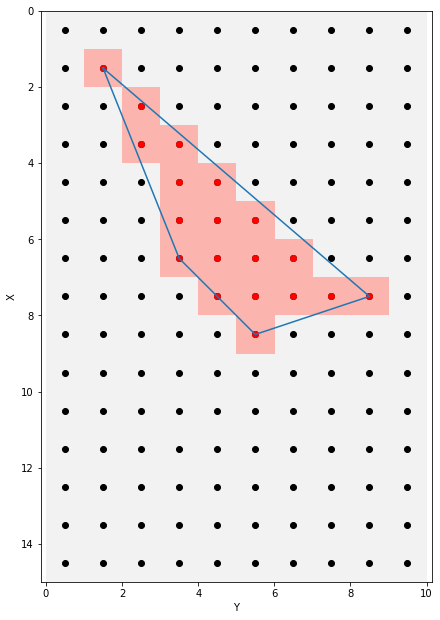

In [195]:
mask2 = polygon2mask((15, 10), coord)

---

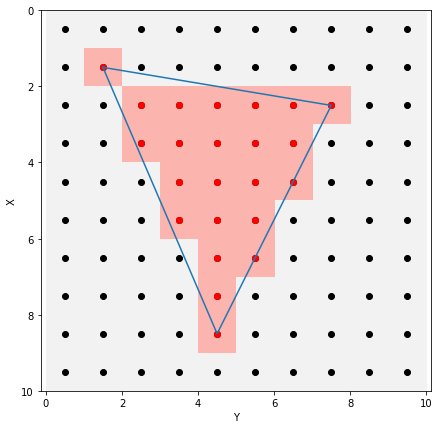

In [196]:
mask3 = polygon2mask((10, 10), xy)

# all touched

In [206]:
x = np.arange(0, h+1, dtype=int)
y = np.arange(0, w+1, dtype=int)

In [207]:
x, y

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))

In [208]:
xx, yy = np.meshgrid(x, y)

In [210]:
pts = np.array([xx.ravel(), yy.ravel()], dtype=int).T
points = MultiPoint(pts)

In [216]:
points.wkt

'MULTIPOINT (0 0, 1 0, 2 0, 3 0, 4 0, 5 0, 6 0, 7 0, 8 0, 9 0, 10 0, 0 1, 1 1, 2 1, 3 1, 4 1, 5 1, 6 1, 7 1, 8 1, 9 1, 10 1, 0 2, 1 2, 2 2, 3 2, 4 2, 5 2, 6 2, 7 2, 8 2, 9 2, 10 2, 0 3, 1 3, 2 3, 3 3, 4 3, 5 3, 6 3, 7 3, 8 3, 9 3, 10 3, 0 4, 1 4, 2 4, 3 4, 4 4, 5 4, 6 4, 7 4, 8 4, 9 4, 10 4, 0 5, 1 5, 2 5, 3 5, 4 5, 5 5, 6 5, 7 5, 8 5, 9 5, 10 5, 0 6, 1 6, 2 6, 3 6, 4 6, 5 6, 6 6, 7 6, 8 6, 9 6, 10 6, 0 7, 1 7, 2 7, 3 7, 4 7, 5 7, 6 7, 7 7, 8 7, 9 7, 10 7, 0 8, 1 8, 2 8, 3 8, 4 8, 5 8, 6 8, 7 8, 8 8, 9 8, 10 8, 0 9, 1 9, 2 9, 3 9, 4 9, 5 9, 6 9, 7 9, 8 9, 9 9, 10 9, 0 10, 1 10, 2 10, 3 10, 4 10, 5 10, 6 10, 7 10, 8 10, 9 10, 10 10)'

In [211]:
poly = Polygon(xy + 0.5)

In [254]:
np.array(poly.exterior.coords)

array([[1.5, 1.5],
       [2.5, 7.5],
       [8.5, 4.5],
       [1.5, 1.5]])

In [212]:
points_in = points.intersection(poly)

In [217]:
points_in.wkt

'MULTIPOINT (2 2, 2 3, 2 4, 3 3, 3 4, 3 5, 3 6, 3 7, 4 3, 4 4, 4 5, 4 6, 5 3, 5 4, 5 5, 5 6, 6 4, 6 5, 7 4, 7 5)'

In [221]:
idx = np.array(points_in, dtype=int)
idx

array([[2, 2],
       [2, 3],
       [2, 4],
       [3, 3],
       [3, 4],
       [3, 5],
       [3, 6],
       [3, 7],
       [4, 3],
       [4, 4],
       [4, 5],
       [4, 6],
       [5, 3],
       [5, 4],
       [5, 5],
       [5, 6],
       [6, 4],
       [6, 5],
       [7, 4],
       [7, 5]])

In [222]:
# =======================
#         A      B
#  x------x------x------
#  |      |  K   |
#  |      |(0,1) |
#  x------x------x------
#  |    C |      | D

#  x is grid points, 
#  ABCD are left upper, right upper, left down, right down
#  of pixel K.
#  Their points relationship
#  
#          grid pts  operate -> pixel id
#          --------  -------    --------
#  A (LU)   (0, 1)    -(0,0)     (0, 1)
#  B (RU)   (0, 2)    -(0,1)     (0, 1)
#  C (LD)   (1, 1)    -(1,0)     (0, 1)
#  D (RD)   (1, 2)    -(1,1)     (0, 1)

idx_ru = idx - np.array([0,1])
idx_ld = idx - np.array([1,0])
idx_rd = idx - np.array([1,1])

idx_merge = np.vstack([idx, idx_ru, idx_ld, idx_rd])
idx_merge


array([[2, 2],
       [2, 3],
       [2, 4],
       [3, 3],
       [3, 4],
       [3, 5],
       [3, 6],
       [3, 7],
       [4, 3],
       [4, 4],
       [4, 5],
       [4, 6],
       [5, 3],
       [5, 4],
       [5, 5],
       [5, 6],
       [6, 4],
       [6, 5],
       [7, 4],
       [7, 5],
       [2, 1],
       [2, 2],
       [2, 3],
       [3, 2],
       [3, 3],
       [3, 4],
       [3, 5],
       [3, 6],
       [4, 2],
       [4, 3],
       [4, 4],
       [4, 5],
       [5, 2],
       [5, 3],
       [5, 4],
       [5, 5],
       [6, 3],
       [6, 4],
       [7, 3],
       [7, 4],
       [1, 2],
       [1, 3],
       [1, 4],
       [2, 3],
       [2, 4],
       [2, 5],
       [2, 6],
       [2, 7],
       [3, 3],
       [3, 4],
       [3, 5],
       [3, 6],
       [4, 3],
       [4, 4],
       [4, 5],
       [4, 6],
       [5, 4],
       [5, 5],
       [6, 4],
       [6, 5],
       [1, 1],
       [1, 2],
       [1, 3],
       [2, 2],
       [2, 3],
       [2, 4],
       [2,

In [232]:
ix, iy = np.where(np.array([[-1,0],[-1,-1],[2,3], [3, -1]]) == -1)
ix

array([0, 1, 1, 3], dtype=int64)

In [228]:
idx_unique = np.unique(idx_merge, axis=0)
idx_unique

array([[1, 1],
       [1, 2],
       [1, 3],
       [1, 4],
       [2, 1],
       [2, 2],
       [2, 3],
       [2, 4],
       [2, 5],
       [2, 6],
       [2, 7],
       [3, 2],
       [3, 3],
       [3, 4],
       [3, 5],
       [3, 6],
       [3, 7],
       [4, 2],
       [4, 3],
       [4, 4],
       [4, 5],
       [4, 6],
       [5, 2],
       [5, 3],
       [5, 4],
       [5, 5],
       [5, 6],
       [6, 3],
       [6, 4],
       [6, 5],
       [7, 3],
       [7, 4],
       [7, 5]])

In [239]:
idx_unique.shape

(33, 2)

In [230]:
iii = np.array([[-1,0],[-1,-1],[2,3], [3, -1]])
iii

array([[-1,  0],
       [-1, -1],
       [ 2,  3],
       [ 3, -1]])

In [234]:
np.delete(iii, np.unique(ix), axis=0)

array([[2, 3]])

In [242]:
# add somw remove data
rm_data = np.array([[-1, 0],
                    [1, -1],
                    [3,10],
                    [10,10],
                    [-1, 10],
                    [10, -1]])

idx_unique = np.vstack([idx_unique, rm_data])
idx_unique.shape

(45, 2)

In [248]:
# remove outliers (-1 and out of bound)

id_meet_left_top_bound = np.where(idx_unique == -1)[0]  # [0] only get row id
id_meet_right_bound = np.where(idx_unique[:, 1] == w)[0]
id_meet_bottom_bound = np.where(idx_unique[:, 0] == h)[0]

print(id_meet_left_top_bound, id_meet_right_bound, id_meet_bottom_bound)

idx_del = np.concatenate([id_meet_left_top_bound, 
                          id_meet_right_bound,
                          id_meet_bottom_bound])

idx_fin = np.delete(idx_unique, np.unique(idx_del), axis=0)

[33 34 37 38 39 40 43 44] [35 36 37 41 42 43] [36 38 42 44]


In [250]:
idx_fin.shape

(33, 2)

In [251]:
mask[idx_fin[:,0], idx_fin[:,1]] = True
mask

array([[False, False, False, False, False, False, False, False, False,
        False],
       [False,  True,  True,  True,  True, False, False, False, False,
        False],
       [False,  True,  True,  True,  True,  True,  True,  True, False,
        False],
       [False, False,  True,  True,  True,  True,  True,  True, False,
        False],
       [False, False,  True,  True,  True,  True,  True, False, False,
        False],
       [False, False,  True,  True,  True,  True,  True, False, False,
        False],
       [False, False, False,  True,  True,  True, False, False, False,
        False],
       [False, False, False,  True,  True,  True, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False]])

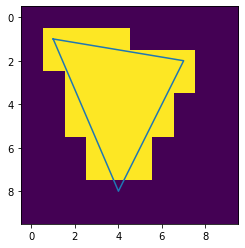

In [253]:
fig, ax = plt.subplots(1,1)

plt.imshow(mask)

ax.plot(*np.flip(xy,axis=1).T)   # plt.imshow shift 0.5 pixels

plt.show()

看来下面还需要和之前的结果重叠到一起？

直接放弃吧==

---

# 使用SRT树加速

In [255]:
lxy = np.array([[1000, 1000],
                [7000, 2000],
                [4000, 8000],
                [1000, 1000]])

In [257]:
lh = 11000
lw = 10000 

In [258]:
lmask = np.zeros((lh, lw), dtype=bool)

In [260]:
lx = np.arange(0, lw) + 0.5
ly = np.arange(0, lh) + 0.5

lxx, lyy = np.meshgrid(lx, ly)

In [263]:
lpts = np.array([lyy.ravel(), lxx.ravel()]).T
lpts

array([[5.00000e-01, 5.00000e-01],
       [5.00000e-01, 1.50000e+00],
       [5.00000e-01, 2.50000e+00],
       ...,
       [1.09995e+04, 9.99750e+03],
       [1.09995e+04, 9.99850e+03],
       [1.09995e+04, 9.99950e+03]])

In [265]:
from shapely.strtree import STRtree
from shapely.geometry import Point

In [267]:
points = MultiPoint(lpts)

KeyboardInterrupt: 

In [266]:
points = [Point(i, j) for i, j in zip(lxx.ravel(), lyy.ravel())]

KeyboardInterrupt: 